In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
basedir = '/scratch/ias41/ae_code'

In [3]:
with open(basedir + '/analysis/data/dirs_info.pkl', 'rb') as f:
    dirs = pickle.load(f)

In [4]:
faers_data = dirs['20200110_faers_unbound_margin_pred_005_PRR2']
sider_data = dirs['20200110_sider_unbound_margin_pred']

In [5]:
faers_data['dir']

'20200110_faers_unbound_margin_pred_005_PRR2'

In [6]:
faers_all_combs = pd.read_csv(basedir + '/ae_target_links/output/' + faers_data['dir'] + '/combinations/all_target_combinations.txt', sep='\t')
faers_best_combs = pd.read_csv(basedir + '/ae_target_links/output/' + faers_data['dir'] + '/combinations/best_target_combinations.txt', sep='\t')

In [7]:
sider_all_combs = pd.read_csv(basedir + '/ae_target_links/output/' + sider_data['dir'] + '/combinations/all_target_combinations.txt', sep='\t')
sider_best_combs = pd.read_csv(basedir + '/ae_target_links/output/' + sider_data['dir'] + '/combinations/best_target_combinations.txt', sep='\t')

In [8]:
for df in sider_best_combs, faers_best_combs, faers_all_combs, sider_all_combs:
    df['nr targets'] = df['Targets'].apply(lambda x: len(eval(x)))

In [9]:
len(faers_all_combs['Adverse Event'].drop_duplicates()), len(faers_best_combs['Adverse Event'].drop_duplicates())

(44, 44)

In [10]:
len(sider_all_combs['Adverse Event'].drop_duplicates()), len(sider_best_combs['Adverse Event'].drop_duplicates())

(59, 59)

In [11]:
len(set(faers_best_combs['Adverse Event'].drop_duplicates()) | set(sider_best_combs['Adverse Event'].drop_duplicates()))

99

In [12]:
faers_counts = pd.DataFrame(faers_best_combs.groupby('nr_targets').nunique())
faers_counts['% assoc'] = (faers_counts['Adverse Event'] / 44)*100

In [13]:
faers_counts

,Targets,nr_targets,Adverse Event,Overall_PPV,Overall_recall,Compounds screened,Compounds screened with AE,Compounds found,False positives,nr targets,% assoc
nr_targets,,,,,,,,,,,
1,13,1,27,19,15,20,15,6,15,1,61.363636
2,15,1,17,16,13,14,10,5,15,1,38.636364


In [14]:
sider_counts = pd.DataFrame(sider_best_combs.groupby('nr_targets').nunique())
sider_counts['% assoc'] = (sider_counts['Adverse Event'] / 59)*100

In [15]:
sider_counts

,Targets,nr_targets,Adverse Event,Overall_PPV,Overall_recall,Compounds screened,Compounds screened with AE,Compounds found,False positives,nr targets,% assoc
nr_targets,,,,,,,,,,,
1,16,1,32,12,23,23,18,4,10,1,54.237288
2,19,1,22,20,21,20,17,8,14,1,37.288136
3,7,1,5,5,5,5,5,3,5,1,8.474576


#### Want to know the improvement by combinations

In [16]:
faers_best_combs.loc[faers_best_combs['Adverse Event']=='GLYCOSURIA']

,Targets,nr_targets,Adverse Event,Overall_PPV,Overall_recall,Compounds screened,Compounds screened with AE,Compounds found,False positives,nr targets
10,{'P35367'},1,GLYCOSURIA,0.714286,0.5,134,10,5,2,1
11,{'P18825'},1,GLYCOSURIA,0.714286,0.5,134,10,5,2,1


In [17]:
faers_info = {}
for AE in set(faers_best_combs.loc[faers_best_combs['nr targets']>1,'Adverse Event'].drop_duplicates()):
    
    best_PPV = list(faers_best_combs.loc[faers_best_combs['Adverse Event']==AE,'Overall_PPV'])[0]
    best_recall = list(faers_best_combs.loc[faers_best_combs['Adverse Event']==AE,'Overall_recall'])[0]

    next_best_PPV = max(faers_all_combs.loc[(faers_all_combs['Adverse Event']==AE)&(faers_all_combs['nr targets']==1),'Overall_PPV'])
    next_best_recall = max(faers_all_combs.loc[(faers_all_combs['Adverse Event']==AE)&(faers_all_combs['nr targets']==1),'Overall_recall'])
     
    perc_change_PPV = ((best_PPV - next_best_PPV) / next_best_PPV) * 100
    perc_change_recall = ((best_recall - next_best_recall) / next_best_recall) * 100
    
    faers_info[AE] = {'Adverse Event': AE, 'PPV change': best_PPV - next_best_PPV, 'Recall change': best_recall - next_best_recall, 'Recall % change': perc_change_recall, 'PPV % change': perc_change_PPV}

In [18]:
sider_info = {}
for AE in set(sider_best_combs.loc[sider_best_combs['nr targets']>1,'Adverse Event'].drop_duplicates()):
    
    best_PPV = list(sider_best_combs.loc[sider_best_combs['Adverse Event']==AE,'Overall_PPV'])[0]
    best_recall = list(sider_best_combs.loc[sider_best_combs['Adverse Event']==AE,'Overall_recall'])[0]

    next_best_PPV = max(sider_all_combs.loc[(sider_all_combs['Adverse Event']==AE)&(sider_all_combs['nr targets']==1),'Overall_PPV'])
    next_best_recall = max(sider_all_combs.loc[(sider_all_combs['Adverse Event']==AE)&(sider_all_combs['nr targets']==1),'Overall_recall'])
     
    perc_change_PPV = ((best_PPV - next_best_PPV) / next_best_PPV) * 100
    perc_change_recall = ((best_recall - next_best_recall) / next_best_recall) * 100
    
    sider_info[AE] = {'Adverse Event': AE, 'PPV change': best_PPV - next_best_PPV, 'Recall change': best_recall - next_best_recall, 'Recall % change': perc_change_recall, 'PPV % change': perc_change_PPV}

In [19]:
faers_changes = pd.DataFrame.from_dict(faers_info, orient='index')
sider_changes = pd.DataFrame.from_dict(sider_info, orient='index')

In [30]:
recall_perc_df_faers = faers_changes[['Recall % change']]
recall_perc_df_faers.rename(columns={'Recall % change': 'values'}, inplace=True)
recall_perc_df_faers['variable_type'] = 'Fraction of\nAE-associated drugs\nthat are active'
recall_perc_df_faers['dataset'] = 'FAERS (n={} AEs)'.format(len(recall_perc_df_faers))

ppv_perc_df_faers = faers_changes[['PPV % change']]
ppv_perc_df_faers.rename(columns={'PPV % change': 'values'}, inplace=True)
ppv_perc_df_faers['variable_type'] = 'PPV'
ppv_perc_df_faers['dataset'] = 'FAERS (n={} AEs)'.format(len(ppv_perc_df_faers))

recall_perc_df_sider = sider_changes[['Recall % change']]
recall_perc_df_sider.rename(columns={'Recall % change': 'values'}, inplace=True)
recall_perc_df_sider['variable_type'] = 'Fraction of\nAE-associated drugs\nthat are active'
recall_perc_df_sider['dataset'] = 'SIDER (n={} AEs)'.format(len(recall_perc_df_sider))

ppv_perc_df_sider = sider_changes[['PPV % change']]
ppv_perc_df_sider.rename(columns={'PPV % change': 'values'}, inplace=True)
ppv_perc_df_sider['variable_type'] = 'PPV'
ppv_perc_df_sider['dataset'] = 'SIDER (n={} AEs)'.format(len(ppv_perc_df_sider))


/scratch/ias41/envs/rainpy/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/scratch/ias41/envs/rainpy/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/scratch/ias41/envs/rainpy/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [31]:
combined_df = pd.concat([recall_perc_df_faers, recall_perc_df_sider, ppv_perc_df_faers, ppv_perc_df_sider])

In [32]:
medians = combined_df.groupby(['variable_type', 'dataset']).median()
medians

values
variable_type                                     dataset                    
Fraction of\nAE-associated drugs\nthat are active FAERS (n=17 AEs)  20.000000
                                                  SIDER (n=27 AEs)  33.333333
PPV                                               FAERS (n=17 AEs) -16.000000
                                                  SIDER (n=27 AEs) -21.428571

In [33]:
combined_df.groupby(['variable_type','dataset']).mean()

values
variable_type                                     dataset                    
Fraction of\nAE-associated drugs\nthat are active FAERS (n=17 AEs)  20.975724
                                                  SIDER (n=27 AEs)  41.609347
PPV                                               FAERS (n=17 AEs) -15.793658
                                                  SIDER (n=27 AEs) -22.599355

In [34]:
combined_df.head()

,values,variable_type,dataset
DIABETIC NEPHROPATHY,14.285714,Fraction of\nAE-associated drugs\nthat are active,FAERS (n=17 AEs)
DRUG WITHDRAWAL SYNDROME NEONATAL,20.000000,Fraction of\nAE-associated drugs\nthat are active,FAERS (n=17 AEs)
TYPE 2 DIABETES MELLITUS,25.000000,Fraction of\nAE-associated drugs\nthat are active,FAERS (n=17 AEs)
CARDIOTOXICITY,42.857143,Fraction of\nAE-associated drugs\nthat are active,FAERS (n=17 AEs)
REFLUX OESOPHAGITIS,16.666667,Fraction of\nAE-associated drugs\nthat are active,FAERS (n=17 AEs)


In [48]:
plt.rcParams.update({'font.size': 19})

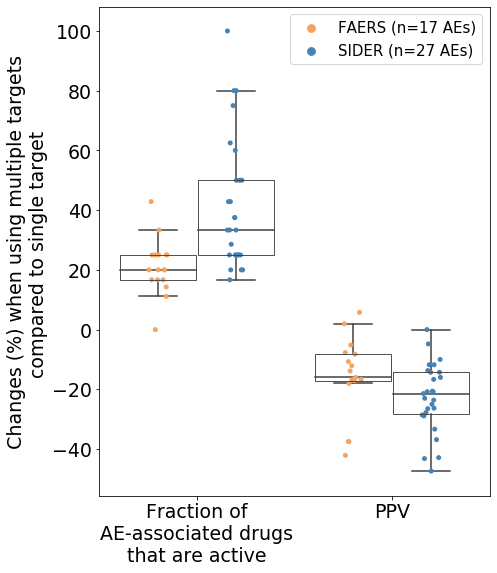

In [49]:
fig = plt.figure(figsize=(7,9))
ax = sns.boxplot(y='values', x='variable_type', showfliers=False, data = combined_df, hue='dataset', orient = 'v' ,  dodge = True, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':0.9}) # alpha = .65, bw = .5 width_viol = .5,
ax1 = sns.stripplot(y='values', x='variable_type', data = combined_df, hue='dataset', orient = 'v' ,  dodge = True, palette=['sandybrown', 'steelblue']) # alpha = .65, bw = .5 width_viol = .5,
handles, labels = plt.gca().get_legend_handles_labels()
ax.set_ylabel('Changes (%) when using multiple targets\ncompared to single target ')
ax.set_xlabel('')
order = [2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=15, loc=1)

plt.savefig(basedir + '/analysis/results/overarching/Improvement_by_target_combinations.png', bbox_inches='tight', dpi=150)

In [53]:
recall_perc_df_faers

,values,variable_type,dataset
FEELING OF BODY TEMPERATURE CHANGE,16.666667,Recall % change,FAERS
KETOACIDOSIS,25.000000,Recall % change,FAERS
CONDUCTION DISORDER,16.666667,Recall % change,FAERS
CEREBROVASCULAR DISORDER,25.000000,Recall % change,FAERS
DIABETIC GASTROPARESIS,20.000000,Recall % change,FAERS
VAGINAL INFECTION,33.333333,Recall % change,FAERS
GASTRITIS EROSIVE,25.000000,Recall % change,FAERS
CARDIOTOXICITY,42.857143,Recall % change,FAERS
REFLUX OESOPHAGITIS,16.666667,Recall % change,FAERS
DIABETIC NEPHROPATHY,14.285714,Recall % change,FAERS


In [52]:
sider_all_combs.loc[sider_all_combs['Adverse Event']=='ORTHOSTATIC HYPOTENSION']

,Targets,nr_targets,Adverse Event,Overall_PPV,Overall_recall,Compounds screened,Compounds screened with AE,Compounds found,False positives,nr targets
369504,"{'P08588', 'Q9Y2D0'}",2,ORTHOSTATIC HYPOTENSION,0.428571,0.250,143,24,6,8,2
369505,{'Q9Y2D0'},1,ORTHOSTATIC HYPOTENSION,0.750000,0.125,143,24,3,1,1
369506,{'P08588'},1,ORTHOSTATIC HYPOTENSION,0.300000,0.125,143,24,3,7,1
